* **1.) What was the change in price of the stock over time?**
* **2.) What was the daily return of the stock on average?**
* **3.) What was the moving average of the various stocks?**
* **4.) What was the correlation between different stocks'?**
* **5.) How much value do we put at risk by investing in a particular stock?**
* **6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM0**

### Configureation libraries

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from datetime import datetime

### Common Libraries

In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Machine Learning Libraries

In [1]:
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

### Data Gathering

##### We need our stock API

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

**WE have to grab/grasp the data from yfinance API: from ticker We can do that(check for Ticker symbols for yfinanace)**

**Ticker symbols is the webite from where we can grasp the the perticular data like any stock like APPL**

In [4]:
df = yf.Ticker("AMZN") # Fetching the data form the Ticker symbol for yfinance

**We need to segregate the(like in how many periodic time we want our data) So distribute the data based on a period**

In [5]:
df

yfinance.Ticker object <AMZN>

**We need to extract the data based on a periodic basis**

In [6]:
data_history = df.history(period = "1mo")
data_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-17 00:00:00-04:00,176.000000,176.210007,172.000000,172.610001,44468400,0.0,0.0
2025-04-21 00:00:00-04:00,169.600006,169.600006,165.289993,167.320007,48126100,0.0,0.0
2025-04-22 00:00:00-04:00,169.850006,176.779999,169.350006,173.179993,56607200,0.0,0.0
2025-04-23 00:00:00-04:00,183.449997,187.380005,180.190002,180.600006,63470100,0.0,0.0
2025-04-24 00:00:00-04:00,180.919998,186.740005,180.179993,186.539993,43763200,0.0,0.0
2025-04-25 00:00:00-04:00,187.619995,189.940002,185.490005,188.990005,36414300,0.0,0.0
2025-04-28 00:00:00-04:00,190.110001,190.220001,184.889999,187.699997,33224700,0.0,0.0
2025-04-29 00:00:00-04:00,183.990005,188.020004,183.679993,187.389999,41667300,0.0,0.0
2025-04-30 00:00:00-04:00,182.169998,185.050003,178.850006,184.419998,55176500,0.0,0.0


**As stock market goes off for weekends(sat & sun) Thats why in the above data it is showing 22/11/2024 is the recent date**

**Above data is just for 1 month period**

#### Description of the orgnization using the stock data

In [7]:
df.info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, fire tablets, fire TVs, echo, ring, blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

### Convert the data into date and time format

In [9]:
from datetime import datetime

In [10]:
current_date = datetime.now() # today's date

**Below we want the data from last Year, same month same date**

In [11]:
start_date = datetime(current_date.year - 1, current_date.month, current_date.day-1)

**current_date.year - 1: current_date of the last year cuz we are subtracting from the current_date of this year**

**current_date.month: current month of this year**

**current_date.day-1 : Same date of the last Year**

* **Start Date = Current_Date (Year = 2024) - 1 = 2023**
* **Current_Date.month = Nov**
* **Current_Data.day - 1 = 20 - 1 = 19**
* **Start_Date = 19th Nov 2023**

In [12]:
start_date

datetime.datetime(2024, 5, 16, 0, 0)

#### Now we'll be working on the data of 1 Year

In [13]:
df = yf.download("AMZN", start_date, current_date) # we are downloading the data form start date to curernt date

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [14]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2024-05-16,183.630005,187.309998,183.460007,185.600006,38834500
2024-05-17,184.699997,185.300003,183.350006,183.759995,33175700
2024-05-20,183.539993,186.669998,183.279999,184.339996,30511800
2024-05-21,183.149994,183.259995,180.750000,182.300003,50839100
2024-05-22,183.130005,185.220001,181.970001,183.880005,28148800


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-05-16 to 2025-05-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   251 non-null    float64
 1   (High, AMZN)    251 non-null    float64
 2   (Low, AMZN)     251 non-null    float64
 3   (Open, AMZN)    251 non-null    float64
 4   (Volume, AMZN)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


**So we'll work with adjusted close price (cuz it is modified price)**

* **Issue above is 2 name columns. So we need to remove AMZN from every column name**

In [16]:
df.columns

MultiIndex([( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])

#### Column Header Preprocessing

In [17]:
df.columns = [f"{i[0]}" for i in df.columns]

In [18]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [24]:
fig = px.line(df, x = df.index, y = 'Close', title = "Amazon Stock Price")
fig.show()

**So this data shows the upward trend AND there is no seasonality**

#### data description

In [25]:
df.describe()

,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,197.204064,199.491793,194.619880,197.191514,4.197318e+07
std,19.161959,19.094721,19.201072,19.236814,1.819943e+07
min,161.020004,162.960007,151.610001,154.210007,1.500750e+07
25%,183.645004,185.830002,181.439995,183.700005,3.025675e+07
50%,192.169998,194.000000,188.470001,191.429993,3.770760e+07
75%,210.150002,212.805000,207.315002,210.135002,4.516340e+07
max,242.059998,242.520004,238.029999,239.020004,1.414484e+08


In [26]:
df.shape

(251, 5)

In [30]:
365 - 104 # days per year - saturdays & sundays including National holidays

261

In [27]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

* **1.) What was the change in price of the stock over time?**

<Axes: xlabel='Close', ylabel='Density'>

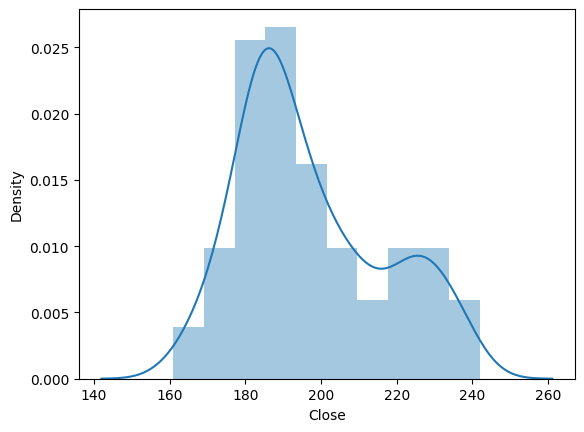

In [29]:
sns.distplot(df["Close"]) # Distribution of the data column(bimodel distribution: where you have always 2 seperate groups/peaks )

### Step-3: Information on close pricing

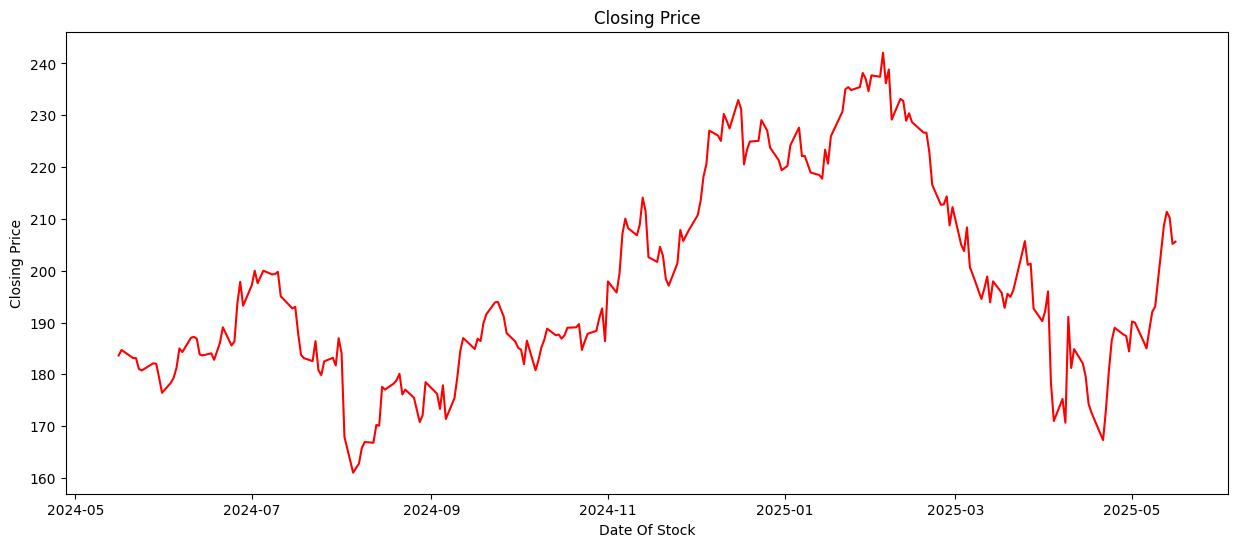

In [31]:
plt.figure(figsize = (15,6))
plt.plot(df.Close, color = "red")
plt.title("Closing Price")
plt.xlabel("Date Of Stock")
plt.ylabel("Closing Price")
plt.show()

### Step-4: **Information on the volumume of assets sold**

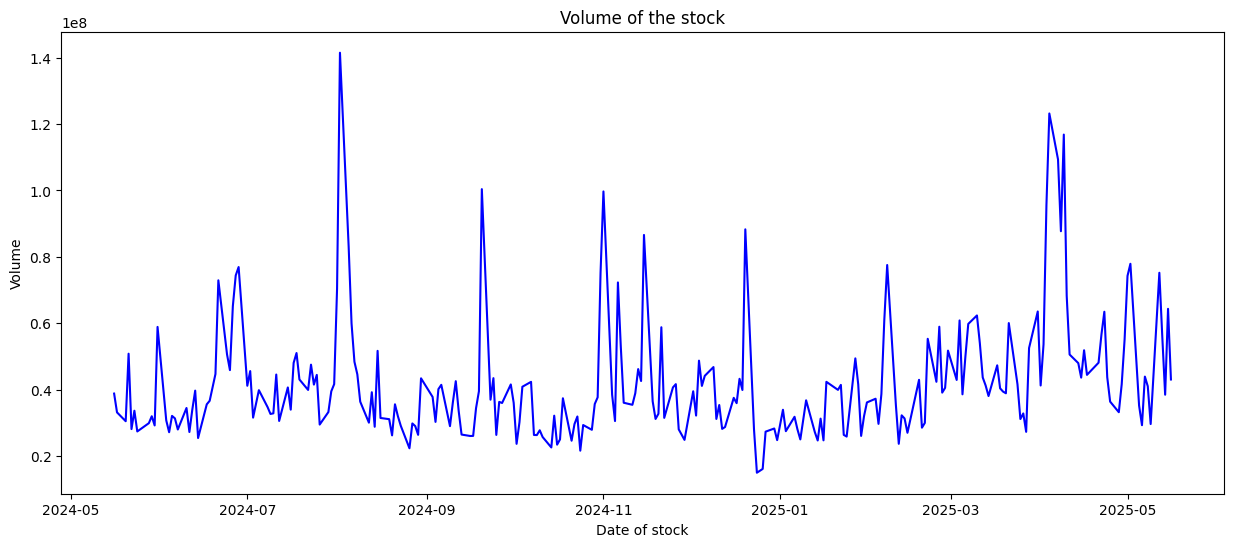

In [32]:
plt.figure(figsize=(15,6))
plt.plot(df.Volume, color= 'blue')
plt.title("Volume of the stock")
plt.xlabel("Date of stock")
plt.ylabel("Volume")
plt.show()

**Using this graph we can conclude that the trade of assets was normal in initial phase.But as soon as we touched the mid year, we can huge inflation in the volume of stock being traded**
* **In May to October, there has been a lot of trading**

### Step-5: Working with moving avg

In [33]:
moving_avg = [10,20,50]  # Moving avg for 10 days, 20 days and 50 days
for x in moving_avg:
    column_name = f"MA for {x} days"
    df[column_name] = df["Close"].rolling(window = x).mean() # Rolling: means basically we take window size and we keep shifting it out

In [34]:
df.head()

,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,
2024-05-16,183.630005,187.309998,183.460007,185.600006,38834500,NaN,NaN,NaN
2024-05-17,184.699997,185.300003,183.350006,183.759995,33175700,NaN,NaN,NaN
2024-05-20,183.539993,186.669998,183.279999,184.339996,30511800,NaN,NaN,NaN
2024-05-21,183.149994,183.259995,180.750000,182.300003,50839100,NaN,NaN,NaN
2024-05-22,183.130005,185.220001,181.970001,183.880005,28148800,NaN,NaN,NaN


In [35]:
fig = px.line(df, x = df.index, y =["MA for 10 days", "MA for 20 days", "MA for 50 days"])

In [36]:
fig

* **Based on the graph:**

* **The MA taken for 50 days, is not able to give us the complete information about the trends, it's too smooth with respect to data**
* **If we talk about 10 days or 20 days, it seems more promising as it is able to capture more information about the data**
* **We can move forward with the MA data having average rolled between 10 or 20 days**

### Step 6 - Daily Returns of the stock on based on Average

* **This will help us understand the risk associated with investment in a particular stock. So, to judge that we have to look on the daily changes**

In [37]:
df["Daily_return"] = df["Close"].pct_change() # pct_change : percentage change per day we are checking
df["Daily_return"].head()

,Daily_return
Date,
2024-05-16,NaN
2024-05-17,0.005827
2024-05-20,-0.006280
2024-05-21,-0.002125
2024-05-22,-0.000109


#### Visualize the percentage that has been changed from the last year

In [38]:
fig = px.line(df, x = "Daily_return" , title = "Change in the stock on the daily basis")

In [39]:
fig.show()

* **If we are investing in this stock, there exists a fair amount of chance that changes will be between -0.04 to 0.04**

### Step 7 - Training and Testing data

In [40]:
df = yf.download("AMZN", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [41]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2014-01-02,19.898500,19.9680,19.701000,19.940001,42756000
2014-01-03,19.822001,20.1355,19.811001,19.914499,44204000
2014-01-06,19.681499,19.8500,19.421000,19.792500,63412000
2014-01-07,19.901501,19.9235,19.714500,19.752001,38320000
2014-01-08,20.096001,20.1500,19.802000,19.923500,46330000


#### Create a seperate dataset that will just have the close column

In [42]:
df_close = df[["Close"]]
df_close

Price,Close
Ticker,AMZN
Date,
2014-01-02,19.898500
2014-01-03,19.822001
2014-01-06,19.681499
2014-01-07,19.901501
2014-01-08,20.096001
...,...
2025-05-12,208.639999
2025-05-13,211.369995


In [43]:
len(df_close)

2861

**training_Perpose = 95% and rest for testing perpose**

In [44]:
train_len = int(np.ceil((len(df_close)* 0.95)))

### Step-8: Building data for prediction phase

##### Scaling the value

* **if data is to big then very small values and large values gets segregates and data will be considered as Bias due to it peaks toward the larger values and vice versa**
* **So to bring the data we need to scale the data into 0-1 range called normalization**

In [45]:
scaler= MinMaxScaler()

In [46]:
scaled_data = scaler.fit_transform(df_close)

In [47]:
pd.DataFrame(scaled_data, columns = ['Scaled Data Part'])

,Scaled Data Part
0,0.024377
1,0.024041
2,0.023424
3,0.024390
4,0.025245
...,...
2856,0.853236
2857,0.865225
2858,0.860306
2859,0.837997


### Step-9: Split the data into training and testing

**We need to create the trainig data**

In [48]:
train_data = scaled_data[0:train_len, :]

**Splitting the data into x_train and y_train**

In [49]:
x_train, y_train = [],[]

**We'll try to create our own sequential data**

In [50]:
for i in range(30,len(train_data)): # i = 30, len = 30 to 251 i.e in train_data[30-30]: 30, 0) 0 means here 1st column in consideration.
    x_train.append(train_data[i-30: i, 0]) # Which means we are creating the batch of 30 records each
    y_train.append(train_data[i,0]) # basically it is for testing part thats why it has only few records.(starts from 30 and so on)

#### Converting to numpy array

In [51]:
x_train, y_train = np.array(x_train), np.array(y_train)

#### Reshaping the array
* **Since the data in RNNs, LSTMs is expected in 3D format that should comprise of (samples, timesteps, no_of_features)**

In [52]:
x_train = np.reshape(x_train,[x_train.shape[0], x_train.shape[1],1])

In [53]:
x_train.shape

(2688, 30, 1)

**Above len = 2577, batch_size = 30, and columns = 1**

### Step -10: Working with LSTM Network

* **start by creating sequential model**

In [54]:
model = Sequential()

* **Adding LSTM layer to the model**

In [55]:
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1))) # only one columns we have in train data(we want n)
model.add(LSTM(64, return_sequences= False)) # here we are more concern about ouptput
model.add(Dense(20)) # 20 neurons for trianing purpose
model.add(Dense(1)) # only one neuron for prediction

**Compilation of the model**

In [56]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,289 (458.16 KB)

 Trainable params: 117,289 (458.16 KB)

 Non-trainable params: 0 (0.00 B)

### Fit the data into the model

In [58]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2688/2688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0035


**Creating our test data**

In [59]:
test_data = scaled_data[train_len - 30: , :]

**Creating the sequences**

In [60]:
x_test= []
y_test = df_close.values[train_len : , :]

In [61]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 30: i, 0])

**Converting it to numpy array**

In [62]:
x_test = np.array(x_test)

In [63]:
x_test

array([[0.76729433, 0.77006093, 0.74814737, ..., 0.84050066, 0.84994237,
        0.86232644],
       [0.77006093, 0.74814737, 0.75548117, ..., 0.84994237, 0.86232644,
        0.87431522],
       [0.74814737, 0.75548117, 0.76184884, ..., 0.86232644, 0.87431522,
        0.89504312],
       ...,
       [0.78090794, 0.7977713 , 0.72048089, ..., 0.78481638, 0.85323599,
        0.86522478],
       [0.7977713 , 0.72048089, 0.68793984, ..., 0.85323599, 0.86522478,
        0.86030632],
       [0.72048089, 0.68793984, 0.70664762, ..., 0.86522478, 0.86030632,
        0.83799748]])

**Reshape the data**

In [64]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

### Prediction

In [65]:
y_test.shape

(143, 1)

In [66]:
preds = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [67]:
preds.shape

(113, 1)

**Inverting back the values to the normal(we do not need scaled values now)**

In [68]:
preds = scaler.inverse_transform(preds)

### Evaluate the model

In [69]:
min_length = min(y_test.shape[0], preds.shape[0])
y_test = y_test[:min_length]
preds = preds[:min_length]

In [70]:
RMSE = np.sqrt(np.mean((y_test - preds)**2))

In [71]:
print(f"RMSE: {RMSE}")

RMSE: 23.60655760754431


### step - 11: Visualize the result

**Actual Data**

In [72]:
train = df_close[: train_len]
pred_data = df_close[train_len :]

**Prediction Data**

In [73]:
min_length = min(len(pred_data), len(preds))
pred_data = pred_data.iloc[:min_length]
preds = preds[:min_length]

In [74]:
pred_data["Prediction"] = preds

In [75]:
pred_data.head()

Price,Close,Prediction
Ticker,AMZN,
Date,,
2024-10-21,189.070007,200.906372
2024-10-22,189.699997,203.169342
2024-10-23,184.710007,206.039597
2024-10-24,186.380005,208.934692
2024-10-25,187.830002,212.629013


**Actual data values**

In [76]:
a = pred_data["Close"].values

In [77]:
b = pred_data["Prediction"].values

In [78]:
min_length = min(len(pred_data.index), len(a), len(b))
pred_data = pred_data.iloc[:min_length]
a = a[:min_length]
b = b[:min_length]

In [79]:
a = a.flatten() if len(a.shape) == 2 else a
b = b.flatten() if len(b.shape) == 2 else b

In [80]:
# If data is from a DataFrame
data = df["Close"].values  # Convert to a NumPy array
data = data.flatten()            # Flatten if needed

In [84]:
last_60_days = df_close[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

future_predictions = []

for _ in range(180):
  x_input = np.array([last_60_days_scaled])
  x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))
  prediction = model.predict(x_input)
  future_predictions.append(prediction[0, 0])
  last_60_days_scaled = np.append(last_60_days_scaled [1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━

array([[200.56572 ],
       [199.08682 ],
       [196.981   ],
       [194.63655 ],
       [192.24086 ],
       [189.89034 ],
       [187.636   ],
       [185.50352 ],
       [183.50282 ],
       [181.63351 ],
       [179.88835 ],
       [178.25594 ],
       [176.72252 ],
       [175.2736  ],
       [173.89493 ],
       [172.57323 ],
       [171.2968  ],
       [170.0556  ],
       [168.84145 ],
       [167.64795 ],
       [166.47032 ],
       [165.30522 ],
       [164.15042 ],
       [163.00476 ],
       [161.86777 ],
       [160.73953 ],
       [159.62042 ],
       [158.51112 ],
       [157.41232 ],
       [156.32475 ],
       [155.24905 ],
       [154.18578 ],
       [153.13536 ],
       [152.09808 ],
       [151.07414 ],
       [150.06355 ],
       [149.06625 ],
       [148.0821  ],
       [147.1109  ],
       [146.15236 ],
       [145.20618 ],
       [144.27205 ],
       [143.34966 ],
       [142.43863 ],
       [141.53868 ],
       [140.64948 ],
       [139.77075 ],
       [138.9

In [85]:
a = a.squeeze()
b = b.squeeze()
future_predictions = future_predictions.squeeze()

# Create future date range starting from the last date in pred_data
future_dates = pd.date_range(start=pred_data.index[-1] + pd.Timedelta(days=1), periods=180, freq='B')  # Business days

# Create main line plot from training data
fig = px.line(train, x=train.index, y=train["Close"].squeeze(), title="DREAMFOLKS.NS Stock Prediction")

# Add scatter for actual test data (a)
fig.add_scatter(x=pred_data.index, y=a, name="Actual data", mode='lines')

# Add scatter for predicted values on test data (b)
fig.add_scatter(x=pred_data.index, y=b, name="Prediction values", mode='lines')

# Add scatter for future 6-month predictions
fig.add_scatter(x=future_dates, y=future_predictions, name="Future 6-Month Forecast", mode='lines', line=dict(dash='dash', color='orange'))

fig.update_layout(template='plotly_dark', xaxis_title="Date", yaxis_title="Stock Price (INR)")

fig.show()